# ACF PACF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [4]:
# NON Stationary
df1 = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq= 'MS'

In [5]:
# Stationary 
df2 = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq= 'D'

In [6]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

### ACF PACF Examples

In [9]:
# For Instance
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [10]:
# ACF
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [17]:
# PACF
pacf(df['a'],nlags=4, method='ywunbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [18]:
# PACF
pacf(df['a'],nlags=4, method='ywmle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [19]:
# PACF
pacf(df['a'],nlags=4, method='ols')

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [15]:
# PACF Yule Walker by Default
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [16]:
# PACF Yule Walker Equation, mle stands for Maximum Likelihood Estimator
pacf_yw(df['a'],nlags=4,method='mle')

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [21]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

### Plotting lag_plot

In [22]:
from pandas.plotting import lag_plot

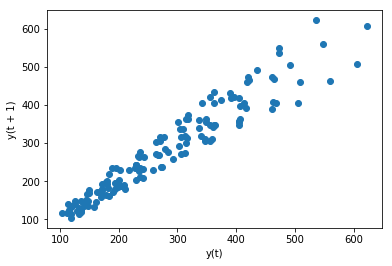

In [32]:
# Non Stationary Data
# Se observa una clara correlación entre y and y(t+1)
lag_plot(df1['Thousands of Passengers'],lag=1)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/lag_plot_NonStationary.png');

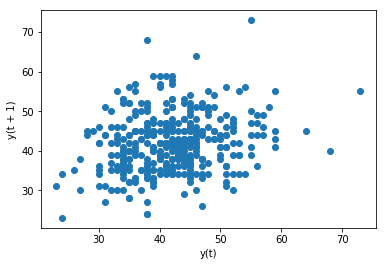

In [31]:
# Stationary Data
# No Se observa una clara correlación entre y and y(t+1)
lag_plot(df2['Births'],lag=1)
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/lag_plot_Stationary.png');

### Plotting ACF PACF

#### NON Stationary Data ACF

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

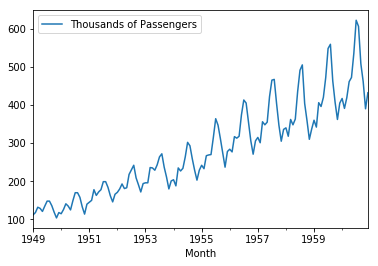

In [36]:
df1.plot();

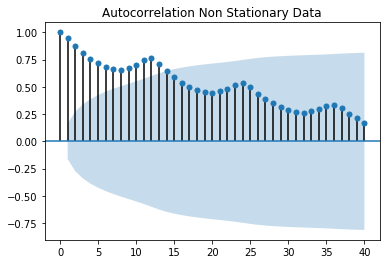

In [42]:
# just 40 lags is enough
# shaded region is a 95 percent confidence interval
# Correlation values OUTSIDE of this confidence interval are VERY HIGHLY LIKELY to be a CORRELATION
plot_acf(df1['Thousands of Passengers'],lags=40,title='Autocorrelation Non Stationary Data')
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/ACF_NonStationary.png');

#### Stationary Data ACF PACF

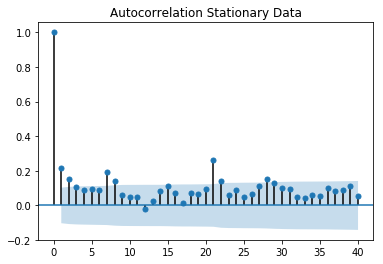

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# just 40 lags is enough
# shaded region is a 95 percent confidence interval
# Correlation values OUTSIDE of this confidence interval are VERY HIGHLY LIKELY to be a CORRELATION
plot_acf(df2['Births'],lags=40,title='Autocorrelation Stationary Data')
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/ACF_Stationary.png');

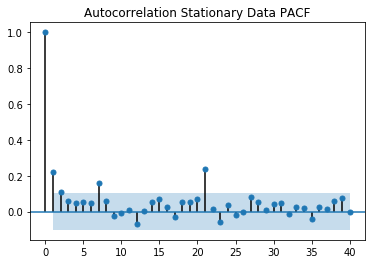

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# just 40 lags is enough
# shaded region is a 95 percent confidence interval
# Correlation values OUTSIDE of this confidence interval are VERY HIGHLY LIKELY to be a CORRELATION
plot_pacf(df2['Births'],lags=40,title='Autocorrelation Stationary Data PACF')
plt.savefig('/home/eduardo/Repos/MyCheatSheets/img/PACF_Stationary.png');